In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
p_morris_param_names = [
    "Import Biomass - Operational cost per energy output",
    "Import Biomass - Maximum energy output",
    "Import Coal - Specific CO2 emission/energy output",
    "Import Coal - Operational cost per energy output - 2016",
    "Import Coal - Operational cost per energy output - 2030",
    "Import Coal - Operational cost per energy output - 2050",
    "Import Crude Oil - Specific CO2 emission/energy output",
    "Import Crude Oil - Operational cost per energy output - 2016",
    "Import Crude Oil - Operational cost per energy output - 2030",
    "Import Crude Oil - Operational cost per energy output - 2050",
    "Import Lignite - Specific CO2 emission/energy output",
    "Import Lignite - Operational cost per energy output",
    "Import Natural Gas - Specific CO2 emission/energy output",
    "Import Natural Gas - Operational cost per energy output - 2016",
    "Import Natural Gas - Operational cost per energy output - 2030",
    "Import Natural Gas - Operational cost per energy output - 2050",
    "Import Waste - Specific CO2 emission/energy output",
    "Import Waste - Maximum energy output",
    "Import GreenH2 - Operational cost per energy output - 2020",
    "Import GreenH2 - Operational cost per energy output - 2030",
    "Import GreenH2 - Operational cost per energy output - 2050",
    "Import GreenH2 - Operational cost per energy output - 2070",
    "Demand Decentral Heat - Minimum energy output - 2016",
    "Demand Decentral Heat - Minimum energy output - 2050",
    "Demand Electricity - Minimum energy output",
    "Demand Industrial Heat HT - Minimum energy output",
    "Demand Industrial Heat LT - Minimum energy output",
    "Demand Propulsion of Vehicles - Minimum energy output",
    "Demand Rail Traffic - Minimum energy output",
    "Demand International Transport - Minimum energy output",
    "PP Biomass - Technical Lifetime",
    "PP Biomass - Operational cost per active power capacity",
    "PP Biomass - Capital cost per new power capacity - 2020",
    "PP Biomass - Capital cost per new power capacity - 2050",
    "PP Coal - Technical Lifetime",
    "PP Coal - Operational cost per active power capacity",
    "PP Coal - Capital cost per new power capacity",
    "PP Gas - Technical Lifetime",
    "PP Gas - Operational cost per active power capacity",
    "PP Gas - Capital cost per new power capacity",
    "PP Lignite - Technical Lifetime",
    "PP Lignite - Operational cost per active power capacity",
    "PP Lignite - Capital cost per new power capacity",
    "PP Nuclear - Technical Lifetime",
    "PP Nuclear - Operational cost per active power capacity",
    "PP Nuclear - Capital cost per new power capacity",
    "PP PV Res - Operational cost per active power capacity",
    "PP PV New - Technical Lifetime",
    "PP PV New - Operational cost per active power capacity",
    "PP PV New - Capital cost per new power capacity - 2020",
    "PP PV New - Capital cost per new power capacity - 2050",
    "PP Run of River - Technical Lifetime",
    "PP Run of River - Operational cost per active power capacity",
    "PP Run of River - Capital cost per new power capacity",
    "PP WindOff Res - Operational cost per active power capacity",
    "PP WindOff New - Technical Lifetime",
    "PP WindOff New - Operational cost per active power capacity",
    "PP WindOff New - Capital cost per new power capacity - 2020",
    "PP WindOff New - Capital cost per new power capacity - 2050",
    "PP WindOn Res - Operational cost per active power capacity",
    "PP WindOn New - Technical Lifetime",
    "PP WindOn New - Operational cost per active power capacity",
    "PP WindOn New - Capital cost per new power capacity - 2020",
    "PP WindOn New - Capital cost per new power capacity - 2050",
    "Furnace Coal - Technical Lifetime",
    "Furnace Coal - Operational cost per active power capacity",
    "Furnace Coal - Capital cost per new power capacity",
    "Furnace Coal - Maximum energy output",
    "Furnace Coal - Minimum energy output",
    "Furnace Electric - Technical Lifetime",
    "Furnace Electric - Capital cost per new power capacity",
    "Furnace Electric - Minimum energy output",
    "Furnace Gas - Technical Lifetime",
    "Furnace Gas - Operational cost per active power capacity",
    "Furnace Gas - Capital cost per new power capacity",
    "Central Biomass Boiler - Technical Lifetime",
    "Central Biomass Boiler - Operational cost per active power capacity",
    "Central Biomass Boiler - Capital cost per new power capacity",
    "Central Heat Pump - Technical Lifetime",
    "Central Heat Pump - Operational cost per active power capacity",
    "Central Heat Pump - Capital cost per new power capacity - 2016",
    "Central Heat Pump - Capital cost per new power capacity - 2050",
    "Central Waste Boiler - Technical Lifetime",
    "Central Waste Boiler - Operational cost per active power capacity",
    "Central Waste Boiler - Capital cost per new power capacity",
    "District Heating - Technical Lifetime",
    "District Heating - Operational cost per active power capacity",
    "District Heating - Capital cost per new power capacity - 2020",
    "District Heating - Capital cost per new power capacity - 2050",
    "District Heating - Minimum fraction of output commodity generated - 2016",
    "District Heating - Maximum fraction of output commodity generated - 2016",
    "District Heating - Maximum fraction of output commodity generated - 2050",
    "Decentral Biomass Heater - Technical Lifetime",
    "Decentral Biomass Heater - Operational cost per active power capacity",
    "Decentral Biomass Heater - Capital cost per new power capacity - 2020",
    "Decentral Biomass Heater - Capital cost per new power capacity - 2050",
    "Decentral Biomass Heater - Minimum fraction of output commodity generated - 2016",
    "Decentral Gas Heater - Technical Lifetime",
    "Decentral Gas Heater - Operational cost per active power capacity",
    "Decentral Gas Heater - Capital cost per new power capacity - 2020",
    "Decentral Gas Heater - Capital cost per new power capacity - 2050",
    "Decentral Gas Heater - Minimum fraction of output commodity generated - 2016",
    "Decentral Gas Heater - Maximum fraction of output commodity generated",
    "Decentral Heat Pump - Technical Lifetime",
    "Decentral Heat Pump - Operational cost per active power capacity",
    "Decentral Heat Pump - Capital cost per new power capacity - 2020",
    "Decentral Heat Pump - Capital cost per new power capacity - 2050",
    "Decentral Oil Heater - Technical Lifetime",
    "Decentral Oil Heater - Operational cost per active power capacity",
    "Decentral Oil Heater - Capital cost per new power capacity - 2020",
    "Decentral Oil Heater - Capital cost per new power capacity - 2050",
    "Decentral Oil Heater - Minimum fraction of output commodity generated - 2016",
    "Decentral Resistive Heater - Technical Lifetime",
    "Decentral Resistive Heater - Operational cost per active power capacity",
    "Decentral Resistive Heater - Capital cost per new power capacity - 2020",
    "Decentral Resistive Heater - Capital cost per new power capacity - 2050",
    "Decentral Resistive Heater - Minimum fraction of output commodity generated - 2016",
    "Biomass CHP - Minimum fraction of input commodity consumed",
    "Biomass CHP - Technical Lifetime",
    "Biomass CHP - Operational cost per active power capacity",
    "Biomass CHP - Capital cost per new power capacity",
    "Biomass CHP - Minimum fraction of input commodity consumed",
    "Biomass CHP - Maximum fraction of input commodity consumed",
    "Coal CHP - Minimum fraction of input commodity consumed",
    "Coal CHP - Technical Lifetime",
    "Coal CHP - Operational cost per active power capacity",
    "Coal CHP - Capital cost per new power capacity",
    "Coal CHP - Minimum fraction of input commodity consumed",
    "Coal CHP - Maximum fraction of input commodity consumed",
    "Gas CHP - Minimum fraction of input commodity consumed",
    "Gas CHP - Technical Lifetime",
    "Gas CHP - Operational cost per active power capacity",
    "Gas CHP - Capital cost per new power capacity",
    "Gas CHP - Minimum fraction of input commodity consumed",
    "Gas CHP - Maximum fraction of input commodity consumed",
    "ICV - Technical Lifetime",
    "ICV - Operational cost per active power capacity",
    "ICV - Capital cost per new power capacity",
    "BEV - Technical Lifetime",
    "BEV - Operational cost per active power capacity",
    "BEV - Capital cost per new power capacity - 2016",
    "BEV - Capital cost per new power capacity - 2050",
    "Power-to-Gas - Operational cost per active power capacity - 2020",
    "Power-to-Gas - Operational cost per active power capacity - 2030",
    "Power-to-Gas - Operational cost per active power capacity - 2050",
    "Power-to-Gas - Capital cost per new power capacity - 2020",
    "Power-to-Gas - Capital cost per new power capacity - 2030",
    "Power-to-Gas - Capital cost per new power capacity - 2050"
]

p_sobol_param_names = [
    'Import Coal - Operational cost per energy output - 2016',
    'Import Natural Gas - Operational cost per energy output - 2016',
    'Import Waste - Specific CO2 emission/energy output',
    'Import Green H2 - Operational cost per energy output - 2030',
    'Demand for Vehicle Propulsion - Minimum energy output',
    'Demand for International Transport - Minimum energy output',
    'Gas PP - Technical Lifetime',
    'Nuclear PP - Operational cost per active power capacity',
    'New Photovoltaic PP - Technical Lifetime',
    'New Photovoltaic PP - Operational cost per active power capacity',
    'New Wind Onshore PP - Technical Lifetime',
    'Coal furnace for industrial heat - Operational cost per active power capacity',
    'Electric furnace for industrial heat - Capital cost per new power capacity',
    'Gas furnace for industrial heat - Capital cost per new power capacity',
    'Central Heat Pump for industrial heat - Capital cost per new power capacity - 2016',
    'Central Waste Boiler for industrial heat - Operational cost per active power capacity',
    'Central Waste Boiler for industrial heat - Capital cost per new power capacity',
    'Decentral Biomass Heater - Technical lifetime',
    'Decentral Gas Heater - Minimum fraction of output commodity generated - 2016',
    'Decentral Heat Pump - Operational cost per active power capacity',
    'Decentral Heat Pump - Capital cost per new power capacity - 2050',
    'Decentral Oil Heater - Technical lifetime',
    'Decentral Resistive Heater - Capital cost per new power capacity - 2020',
    'Decentral Resistive Heater - Minimum fraction of output commodity generated - 2016',
    'Biomass CHP - Technical lifetime',
    'Biomass CHP - Minimum fraction of input commodity consumed',
    'Biomass CHP - Maximum fraction of input commodity consumed',
    'Coal CHP - Minimum fraction of input commodity consumed',
    'Gas CHP - Maximum fraction of input commodity consumed',
    'Electricity for BEV propulsion - Capital cost per new power capacity - 2050',
]

p_sobol_var_names = [
    'Total annual CO2 emission - 2015',
    'Total annual CO2 emission - 2020',
    'Total annual CO2 emission - 2045',
    'Import Biomass - Active capacity - 2030',
    'Import Biomass - Total energy output - 2030',
    'Import Coal - Total energy output - 2030',
    'Import Coal - Active capacity - 2060',
    'Import Coal - Total energy output - 2060',
    'Import Lignite - Active capacity - 2030',
    'Import Lignite - Total energy output - 2030',
    'Import Lignite - Active capacity - 2060',
    'Import Natural Gas - Active capacity - 2030',
    'Import Natural Gas - Total energy output - 2030',
    'Import Natural Gas - Active capacity - 2060',
    'Import Waste - Active capacity - 2030',
    'Import Waste - Active capacity - 2060',
    'Integrate Gas - Active capacity - 2030',
    'Integrate Gas - Total energy output - 2030',
    'Integrate Gas - Active capacity - 2060',
    'Biomass PP - Active capacity - 2030',
    'Biomass PP - Total energy output - 2030',
    'Coal PP - Active capacity - 2030',
    'Coal PP - Active capacity - 2060',
    'Coal PP - Total energy output - 2060',
    'Lignite PP - Total energy output - 2030',
    'Photovoltaic PP - Total energy output - 2030',
    'Run of River PP - Total energy output - 2060',
    'Residual Wind Offshore PP - Total energy output - 2030',
    'New Wind Offshore PP - Total energy output - 2060',
    'Residual Wind Onshore PP - Total energy output - 2030',
    'New Wind Onshore PP - Active capacity - 2030',
    'New Wind Onshore PP - Total energy output - 2030',
    'New Wind Onshore PP - Active capacity - 2060',
    'New Wind Onshore PP - Total energy output - 2060',
    'Coal Furnace - Active capacity - 2060',
    'Electric Furnace - Active capacity - 2060',
    'Electric Furnace - Total energy output - 2060',
    'Gas Furnace - Total energy output - 2060',
    'Temperature Downgrade for Industrial Heat - Active capacity - 2030',
    'Temperature Downgrade for Industrial Heat - Active capacity - 2060',
    'Central Biomass Boiler - Active capacity - 2030',
    'Central Biomass Boiler - Total energy output - 2030',
    'Central Biomass Boiler - Total energy output - 2060',
    'Central Heat Pump - Active capacity - 2060',
    'Central Heat Pump - Total energy output - 2060',
    'Central Waste Boiler - Active capacity - 2030',
    'District Heating - Active capacity - 2030',
    'District Heating - Total energy output - 2030',
    'District Heating - Active capacity - 2060',
    'District Heating - Total energy output - 2060',
    'Decentral Gas Heater - Active capacity - 2030',
    'Decentral Gas Heater - Total energy output - 2030',
    'Decentral Heat Pump - Active capacity - 2030',
    'Decentral Heat Pump - Total energy output - 2030',
    'Decentral Oil Heater - Total energy output - 2030',
    'Biomass CHP - Active capacity - 2030',
    'Biomass CHP - Total energy output - 2030',
    'Biomass CHP - Active capacity - 2060',
    'Biomass CHP - Total energy output - 2060',
    'Biomass CHP Help (Dummy) - Active capacity - 2030',
    'Biomass CHP Help (Dummy) - Total energy output - 2030',
    'Biomass CHP Help (Dummy) - Active capacity - 2060',
    'Biomass CHP Help (Dummy) - Total energy output - 2060',
    'Biomass CHP Help (Electricity) - Active capacity - 2030',
    'Biomass CHP Help (Electricity) - Total energy output - 2030',
    'Biomass CHP Help (Electricity) - Active capacity - 2060',
    'Biomass CHP Help (Electricity) - Total energy output - 2060',
    'Biomass CHP Help (Industrial Heat) - Active capacity - 2030',
    'Biomass CHP Help (Industrial Heat) - Total energy output - 2030',
    'Biomass CHP Help (Industrial Heat) - Active capacity - 2060',
    'Biomass CHP Help (Industrial Heat) - Total energy output - 2060',
    'Coal CHP Help (Dummy) - Total energy output - 2030'
]

In [12]:
# Loads morris results

morris_df = []
with (open(f'GSAResults/DEModel_V2-Base-26-02-24_21-39/morris_mu_star.pkl', "rb")) as openfile:
    while True:
        try:
            morris_df.append(pickle.load(openfile))
        except EOFError:
            break
morris_df = morris_df[0]
morris_df.columns = p_morris_param_names

In [13]:
# Sets variables and parameter names based on what's available in the results

var_names = list(morris_df.index)
param_names = list(morris_df.columns)

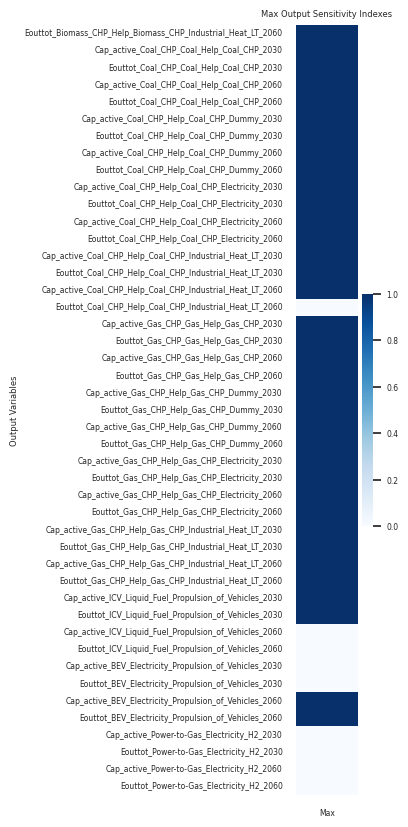

In [54]:
# Plots the maximum sensitivity indexes for each variable in parts (uncomment only one 'heatmap' at a time)

df_rows = pd.DataFrame({"Max":list(morris_df.max(axis=1))},
                       index=list(morris_df.index))
sns.set(font_scale=0.5)
plt.figure(figsize=(1, 10))
#sns.heatmap(df_rows[0:50], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
#sns.heatmap(df_rows[50:100], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
#sns.heatmap(df_rows[100:150], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
#sns.heatmap(df_rows[150:200], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
sns.heatmap(df_rows[200:246], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
plt.title('Max Output Sensitivity Indexes')
plt.ylabel('Output Variables')
plt.show()

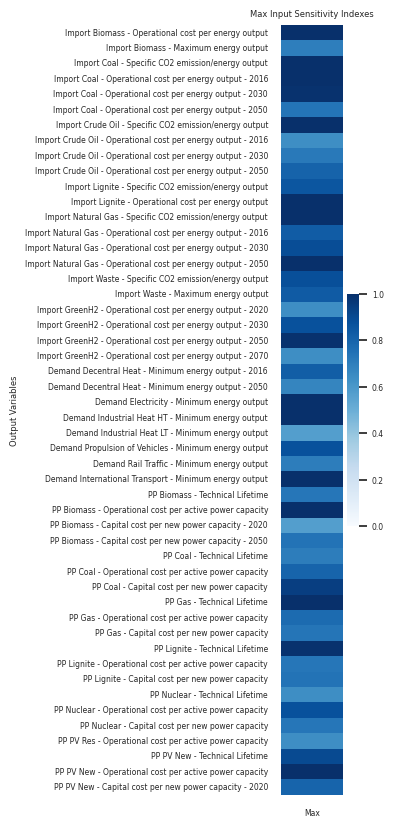

In [79]:
# Plots the maximum sensitivity indexes for each parameter in parts (uncomment only one 'heatmap' at a time)

df_columns = pd.DataFrame({"Max":list(morris_df.max())},
                          index=p_morris_param_names)
sns.set(font_scale=0.5)
plt.figure(figsize=(1, 10))
sns.heatmap(df_columns[0:50], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
#sns.heatmap(df_columns[50:100], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
#sns.heatmap(df_columns[100:149], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
plt.title('Max Input Sensitivity Indexes')
plt.ylabel('Output Variables')
plt.show()

In [80]:
# Compute the sum of all contributions per parameter and organize it descending

df_sum = pd.DataFrame({"Sum":list(morris_df.sum(axis=0))},
                      index=p_morris_param_names)
df_sum = df_sum.sort_values(by="Sum",ascending=False)
max_value = np.array(df_sum).max()

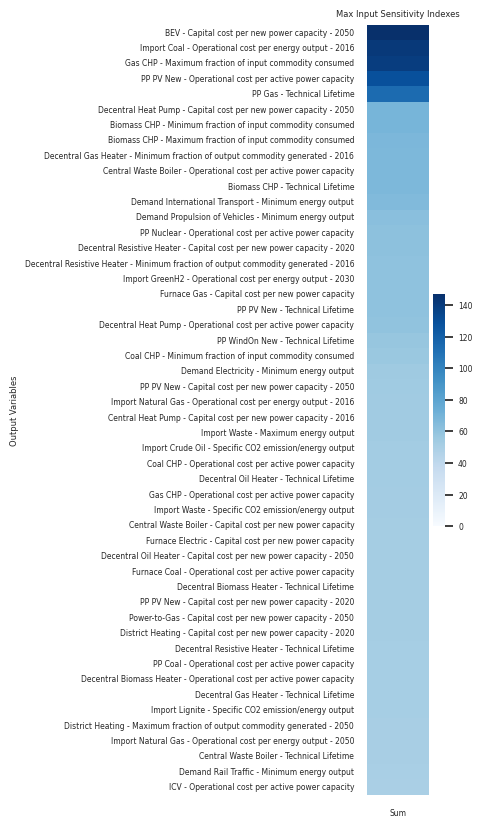

In [83]:
# Plots the sum of sensitivity indexes for each parameter in parts (uncomment only one 'heatmap' at a time)

sns.set(font_scale=0.5)
plt.figure(figsize=(1, 10))
sns.heatmap(df_sum[0:50], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=max_value)
#sns.heatmap(df_sum[50:100], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=max_value)
#sns.heatmap(df_sum[100:149], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=max_value)
plt.title('Max Input Sensitivity Indexes')
plt.ylabel('Output Variables')
plt.show()

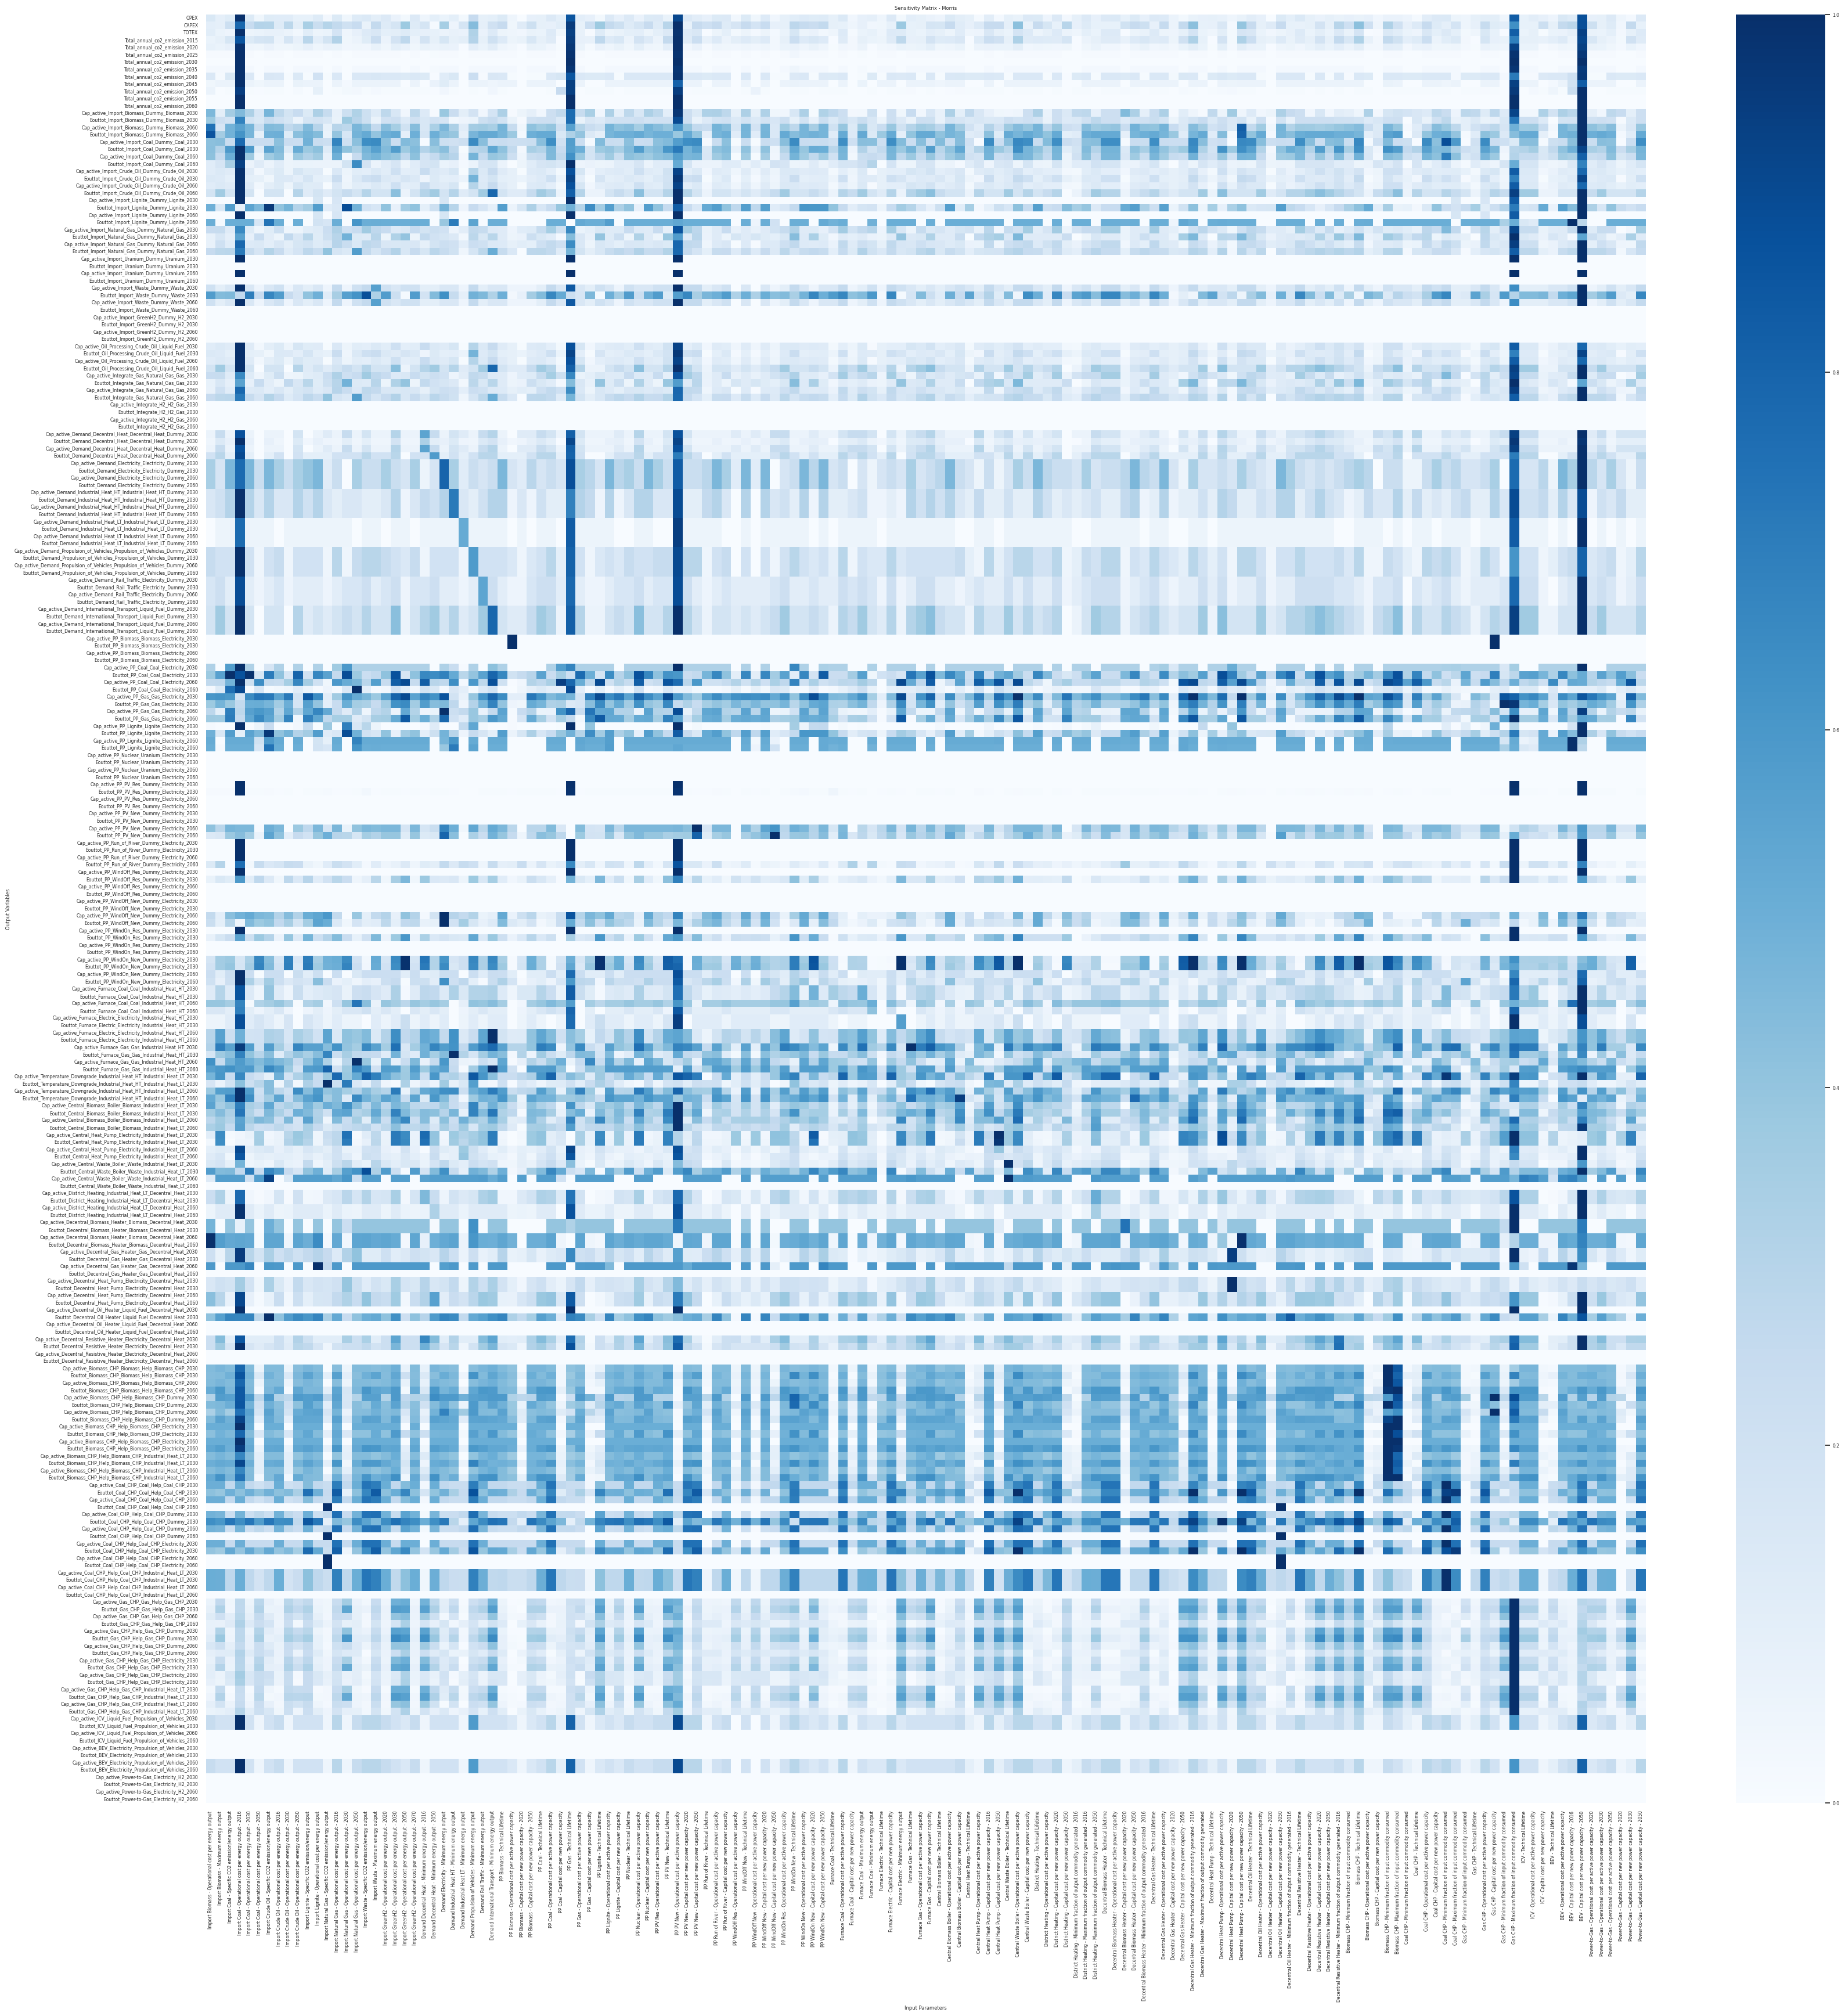

In [90]:
# Plot the full sensitivity heatmap

sns.set(font_scale=0.5)
plt.figure(figsize=(40, 40))
sns.heatmap(morris_df, annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
plt.title('Sensitivity Matrix - Morris')
plt.xlabel('Input Parameters')
plt.ylabel('Output Variables')
plt.show()

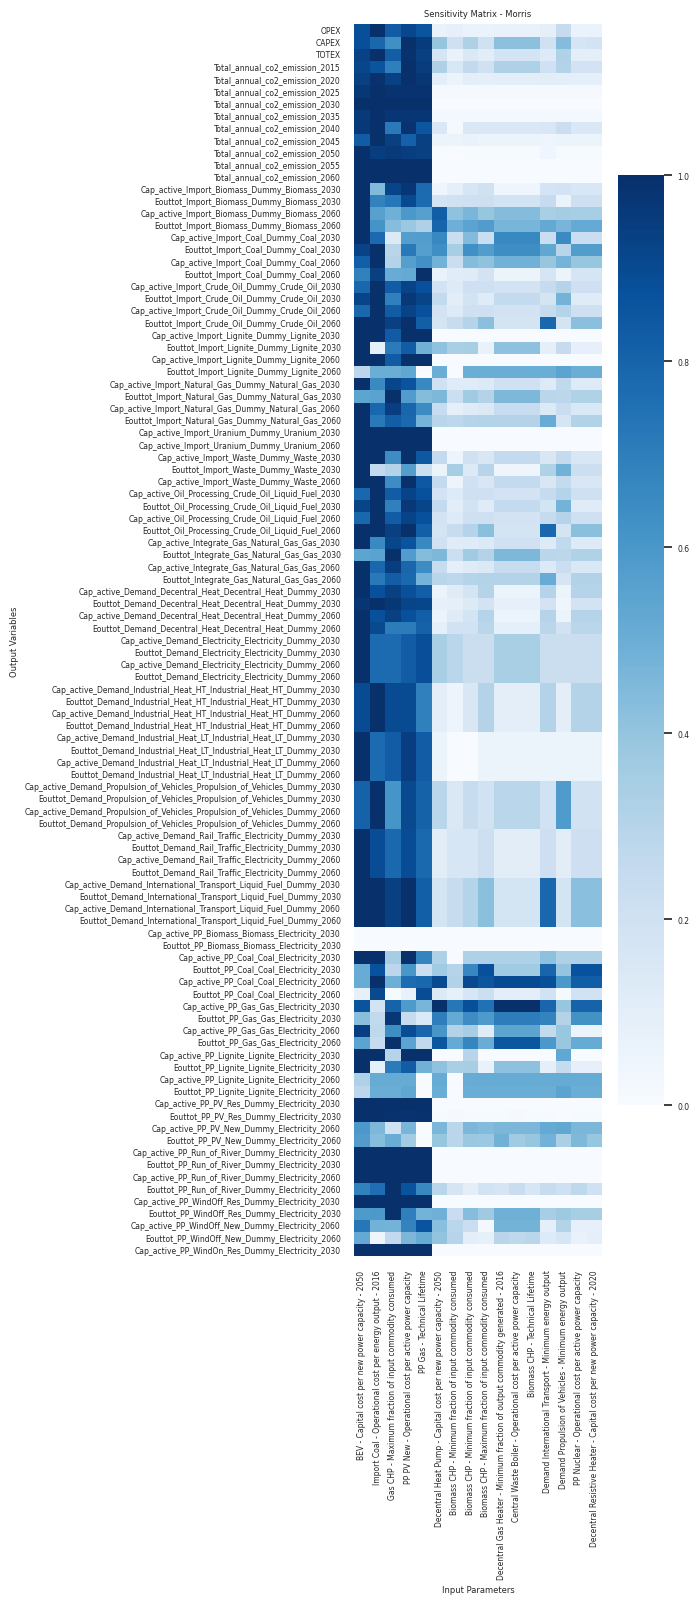

In [97]:
# Plots a heatmap with the top contributing parameters

rows_to_drop = []

for i in range(len(morris_df)):
    if np.max(morris_df.iloc[i]) < 0.5:
        rows_to_drop.append(morris_df.iloc[i].name)

df_morris = morris_df.drop(rows_to_drop)

df_sum = df_morris.sum(axis=0)
top_10 = list(df_sum.sort_values(ascending=False).head(15).index)

m_piece = int(len(df_morris)/2)

# Plot heatmap
sns.set(font_scale=0.5)
plt.figure(figsize=(4, 16))
sns.heatmap(df_morris[top_10].iloc[0:m_piece], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
#sns.heatmap(df_morris[top_10].iloc[m_piece:len(df_morris)], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
plt.title('Sensitivity Matrix - Morris')
plt.xlabel('Input Parameters')
plt.ylabel('Output Variables')
plt.show()

In [28]:
# Saves a bar chart for the top contributions for each variable

for idx in range(len(var_names)):
    th = 0.2
    output_var = var_names[idx]

    mu = morris_df.iloc[idx]
    params = np.array(p_morris_param_names)
    
    if np.sum(mu) == 0:
        continue

    # Sort arrays based on the first array
    sort_idx = np.argsort(mu)
    mu = mu.iloc[sort_idx]
    params = params[sort_idx]

    # Cut values under the threshold
    keep = mu >= th
    mu = mu[keep]
    params = params[keep]

    # Plotting
    bar_width = 0.8
    index = np.arange(len(params))

    fig = plt.figure(figsize=(10, len(mu)*0.5))

    plt.barh(index, mu, bar_width, label='mu*', color='b')
    plt.yticks(index, params)
    plt.xlabel('Sensitivity Index')
    plt.title(f'Sensitivity Analysis for {output_var}')
    plt.tight_layout()
    plt.legend()
    #plt.show()
    plt.savefig(f'GSAResults/DEModel_V2-Base-26-02-24_21-39/Plots/Parameters_mu_star/{idx}_{output_var}_mu_star.png')
    plt.close(fig)

In [22]:
# Loads all of sobol results

df_S1 = []
with (open(f'GSAResults/DEModel_V2-Base-26-02-24_21-39/S1.pkl', "rb")) as openfile:
    while True:
        try:
            df_S1.append(pickle.load(openfile))
        except EOFError:
            break
df_S1 = df_S1[0]
df_S2 = []
with (open(f'GSAResults/DEModel_V2-Base-26-02-24_21-39/S2.pkl', "rb")) as openfile:
    while True:
        try:
            df_S2.append(pickle.load(openfile))
        except EOFError:
            break
df_S2 = df_S2[0]
df_ST = []
with (open(f'GSAResults/DEModel_V2-Base-26-02-24_21-39/ST.pkl', "rb")) as openfile:
    while True:
        try:
            df_ST.append(pickle.load(openfile))
        except EOFError:
            break
df_ST = df_ST[0]

In [23]:
# Filters all of the results before plotting a complete heatmap

rows_to_drop = []
for i in range(df_ST.shape[0]):
    if np.max(df_ST.iloc[i]) < 0.5 and np.max(df_S1.iloc[i]) < 0.5:
        rows_to_drop.append(df_ST.iloc[i].name)

df_ST_new = df_ST.dropna().drop(rows_to_drop)
df_S1_new = df_S1.dropna().drop(rows_to_drop)

diff_total = []
for i in range(df_ST_new.shape[0]):
    if np.sum(df_ST_new.iloc[i]) > 1.2*np.sum(df_S1_new.iloc[i]):
        diff_total.append(df_ST_new.iloc[i].name)

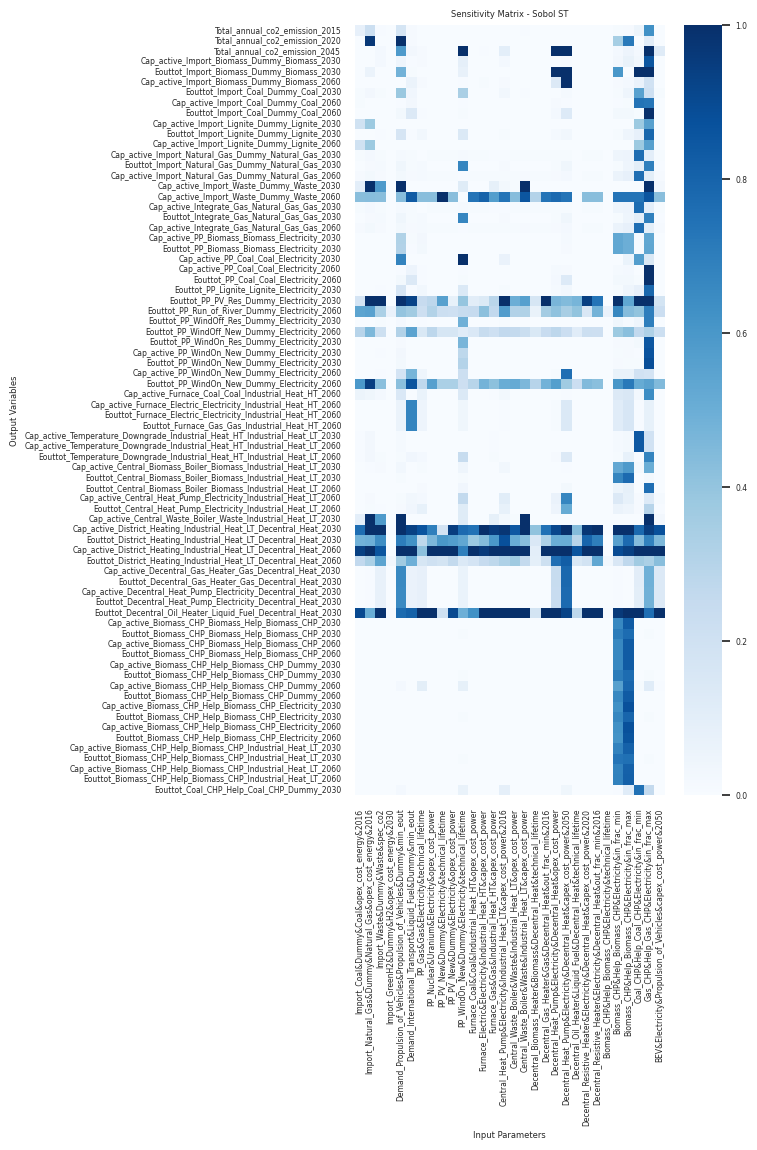

In [27]:
# Plot ST heatmap of variables where S1 < 80% ST (remove '.loc[diff_total]' to plot everything)

sns.set(font_scale=0.5)
plt.figure(figsize=(5, 10))
sns.heatmap(df_ST_new.loc[diff_total], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
plt.title('Sensitivity Matrix - Sobol ST')
plt.xlabel('Input Parameters')
plt.ylabel('Output Variables')
plt.show()

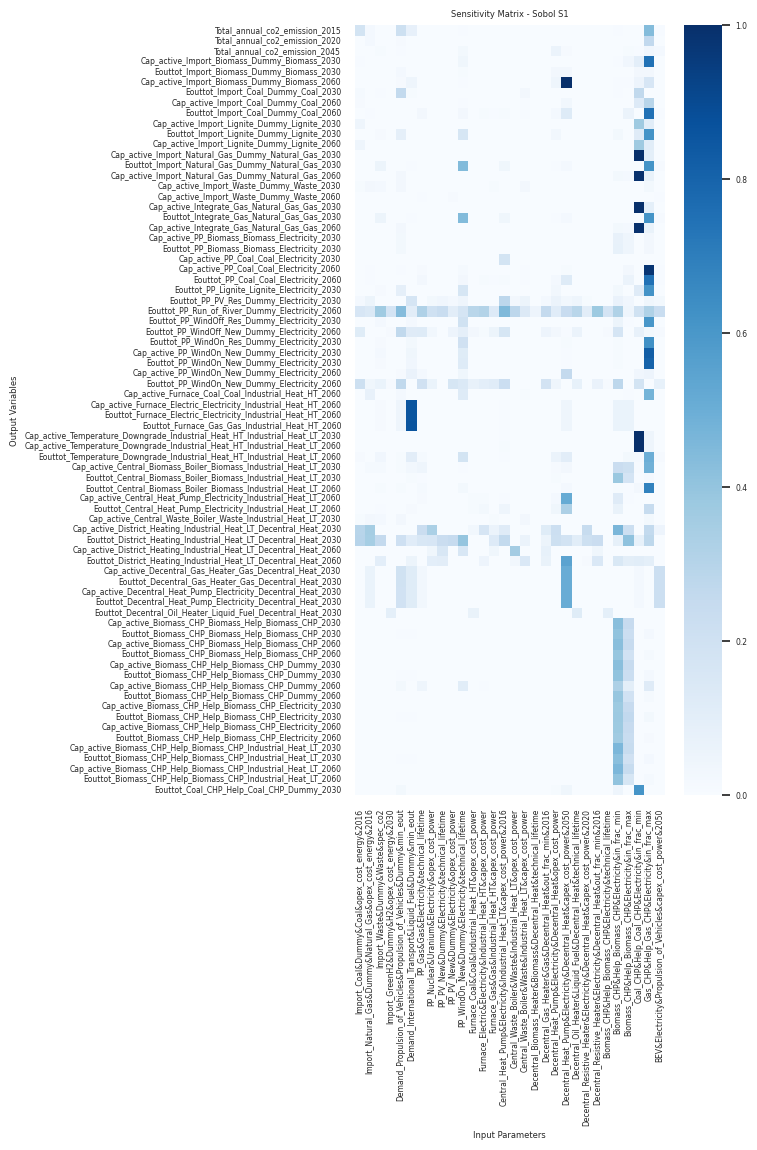

In [148]:
# Plot S1 heatmap of variables where S1 < 80% ST (remove '.loc[diff_total]' to plot everything)

sns.set(font_scale=0.5)
plt.figure(figsize=(5, 10))
sns.heatmap(df_S1_new.loc[diff_total], annot=False, cmap=sns.color_palette("Blues", as_cmap=True), fmt=".2f", vmin=0, vmax=1)
plt.title('Sensitivity Matrix - Sobol S1')
plt.xlabel('Input Parameters')
plt.ylabel('Output Variables')
plt.show()

In [28]:
# Analysis of the variables where S1 is more than 80% of ST

df_S1_plus80 = df_S1.dropna()
df_ST_plus80 = df_ST.dropna()
df_S2_plus80 = df_S2.dropna()

var_names = list(df_ST_plus80.index)
param_names = list(df_ST_plus80.columns)

rows_to_drop = []
cols_to_drop = []

for i in range(df_S1_plus80.shape[0]):
    if (np.max(df_S1_plus80.iloc[i]) < 0.5 and np.max(df_ST_plus80.iloc[i]) < 0.5) or (np.sum(df_S1_plus80.iloc[i]) <= 0.8*np.sum(df_ST_plus80.iloc[i])):
        rows_to_drop.append(var_names[i])

for i in range(df_S1_plus80.shape[1]):
    if (np.max(df_S1_plus80.iloc[i]) < 0.5 and np.max(df_ST_plus80.iloc[i]) < 0.5):
        cols_to_drop.append(param_names[i])

df_S1_plus80 = df_S1_plus80.drop(rows_to_drop)
#df_S1_plus80 = df_S1_plus80.drop(cols_to_drop, axis=1)
df_ST_plus80 = df_ST_plus80.drop(rows_to_drop)
#df_ST_plus80 = df_ST_plus80.drop(cols_to_drop, axis=1)
df_S2_plus80 = df_S2_plus80.drop(rows_to_drop)

var_names_plus80 = list(df_ST_plus80.index)
param_names = list(df_ST_plus80.columns)

In [29]:
# Plots second order heatmap where S1 is more than 80% of ST

for idx in range(len(var_names_plus80)):
    order_2_df = pd.DataFrame(columns=p_sobol_param_names,index=p_sobol_param_names)

    for i in range(len(p_sobol_param_names)):
        order_2 = df_S2_plus80.iloc[idx,i]
        for j in range(i):
            order_2[j] = df_S2_plus80.iloc[idx,j][i]
        order_2 = np.array(order_2).reshape(len(order_2),1)
        order_2_df.iloc[:,i] = order_2
    order_2_df = order_2_df.apply(pd.to_numeric)

    fig = plt.figure(figsize=(6, 6))
    sns.set(font_scale=0.5)
    hm = sns.heatmap(order_2_df, annot=False, cmap=sns.color_palette("coolwarm_r", as_cmap=True), fmt=".2f", vmin=-1, vmax=1)
    plt.title(f'Sensitivity Matrix - S2 - {var_names_plus80[idx]}')
    plt.xlabel('Input Parameters')
    plt.ylabel('Output Variables')
    #plt.show()
    hm_fig = hm.get_figure()
    hm_fig.savefig(f'GSAResults/DEModel_V2-Base-26-02-24_21-39/Plots/Parameters_S2_plus80/{idx}_{var_names_plus80[idx]}_S2.png', dpi=400, bbox_inches="tight")
    plt.close(fig)

In [30]:
# Plots S1-ST bar chart where S1 is more than 80% of ST

for idx in range(len(var_names_plus80)):
    th = 0.01
    output_var = var_names_plus80[idx]

    S1 = df_S1_plus80.iloc[idx]
    ST = df_ST_plus80.iloc[idx]
    params = np.array(p_sobol_param_names)

    # Sort arrays based on the first array
    sort_idx = np.argsort(ST)
    ST = ST.iloc[sort_idx]
    S1 = S1.iloc[sort_idx]
    params = params[sort_idx]

    # Cut values under the threshold
    keep = ST >= th
    ST = ST[keep]
    S1 = S1[keep]
    params = params[keep]

    # Plotting
    bar_width = 0.8
    index = np.arange(len(params))

    fig = plt.figure(figsize=(10, len(ST)*0.5))

    for i in range(len(params)):
        if S1.iloc[i] > ST.iloc[i]:
            if i == len(params)-1:
                plt.legend(['ST','S1'])
            plt.barh(i, ST.iloc[i], bar_width, color='r')
            plt.barh(i, S1.iloc[i] - ST.iloc[i], bar_width, color='b', left=ST.iloc[i])
        else:
            if i == len(params)-1:
                plt.legend(['S1','ST'])
            plt.barh(i, S1.iloc[i], bar_width, color='b')
            plt.barh(i, ST.iloc[i] - np.clip(S1.iloc[i], 0, 10), bar_width, color='r', left=np.clip(S1.iloc[i], 0, 10))

    plt.yticks(index, params)
    plt.xlabel('Sensitivity Index')
    plt.title(f'Sensitivity Analysis for {output_var}')
    plt.tight_layout()
    #plt.show()
    plt.savefig(f'GSAResults/DEModel_V2-Base-26-02-24_21-39/Plots/Parameters_ST_S1_plus80/{idx}_{output_var}_ST_S1.png')
    plt.close(fig)

/tmp/ipykernel_375/2488162691.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_375/2488162691.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_375/2488162691.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_375/2488162691.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_375/2488162691.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_375/2488162691.py:42: UserWarning: Tight

In [21]:
# Analysis of variables where S1 is <= 80% of ST

df_S1_less80 = df_S1.dropna()
df_ST_less80 = df_ST.dropna()
df_S2_less80 = df_S2.dropna()

var_names = list(df_ST_less80.index)
param_names = list(df_ST_less80.columns)

rows_to_drop = []
cols_to_drop = []

for i in range(df_S1_less80.shape[0]):
    if (np.max(df_S1_less80.iloc[i]) < 0.5 and np.max(df_ST_less80.iloc[i]) < 0.5) or (np.sum(df_S1_less80.iloc[i]) > 0.8*np.sum(df_ST_less80.iloc[i])):
        rows_to_drop.append(var_names[i])

for i in range(df_S1_less80.shape[1]):
    if (np.max(df_S1_less80.iloc[i]) < 0.5 and np.max(df_ST_less80.iloc[i]) < 0.5):
        cols_to_drop.append(param_names[i])

df_S1_less80 = df_S1_less80.drop(rows_to_drop)
#df_S1_less80 = df_S1_less80.drop(cols_to_drop, axis=1)
df_ST_less80 = df_ST_less80.drop(rows_to_drop)
#df_ST_less80 = df_ST_less80.drop(cols_to_drop, axis=1)
df_S2_less80 = df_S2_less80.drop(rows_to_drop)

var_names = list(df_ST_less80.index)
param_names = list(df_ST_less80.columns)

In [329]:
# Plots second order heatmap where S1 is less than 80% of ST

for idx in range(len(p_sobol_var_names)):
    order_2_df = pd.DataFrame(columns=p_sobol_param_names,index=p_sobol_param_names)

    for i in range(len(p_sobol_param_names)):
        order_2 = df_S2_less80.iloc[idx,i]
        for j in range(i):
            order_2[j] = df_S2_less80.iloc[idx,j][i]
        order_2 = np.array(order_2).reshape(len(order_2),1)
        order_2_df.iloc[:,i] = order_2
    order_2_df = order_2_df.apply(pd.to_numeric)

    fig = plt.figure(figsize=(6, 6))
    sns.set(font_scale=0.5)
    hm = sns.heatmap(order_2_df, annot=False, cmap=sns.color_palette("coolwarm_r", as_cmap=True), fmt=".2f", vmin=-1, vmax=1)
    plt.title(f'Sensitivity Matrix - S2 - {p_sobol_var_names[idx]}')
    plt.xlabel('Input Parameters')
    plt.ylabel('Output Variables')
    #plt.show()
    hm_fig = hm.get_figure()
    hm_fig.savefig(f'GSAResults/DEModel_V2-Base-26-02-24_21-39/Plots/Parameters_S2/{idx}_{p_sobol_var_names[idx]}_S2.png', dpi=400, bbox_inches="tight")
    plt.close(fig)

In [319]:
# Plots S1-ST bar chart where S1 is less than 80% of ST

for idx in range(len(p_sobol_var_names)):
    th = 0.01
    output_var = p_sobol_var_names[idx]

    S1 = df_S1_less80.iloc[idx]
    ST = df_ST_less80.iloc[idx]
    params = np.array(p_sobol_param_names)

    # Sort arrays based on the first array
    sort_idx = np.argsort(ST)
    ST = ST.iloc[sort_idx]
    S1 = S1.iloc[sort_idx]
    params = params[sort_idx]

    # Cut values under the threshold
    keep = ST >= th
    ST = ST[keep]
    S1 = S1[keep]
    params = params[keep]

    # Plotting
    bar_width = 0.8
    index = np.arange(len(params))

    fig = plt.figure(figsize=(10, len(ST)*0.5))

    for i in range(len(params)):
        if S1.iloc[i] > ST.iloc[i]:
            if i == len(params)-1:
                plt.legend(['ST','S1'])
            plt.barh(i, ST.iloc[i], bar_width, color='r')
            plt.barh(i, S1.iloc[i] - ST.iloc[i], bar_width, color='b', left=ST.iloc[i])
        else:
            if i == len(params)-1:
                plt.legend(['S1','ST'])
            plt.barh(i, S1.iloc[i], bar_width, color='b')
            plt.barh(i, ST.iloc[i] - np.clip(S1.iloc[i], 0, 10), bar_width, color='r', left=np.clip(S1.iloc[i], 0, 10))

    plt.yticks(index, params)
    plt.xlabel('Sensitivity Index')
    plt.title(f'Sensitivity Analysis for {output_var}')
    plt.tight_layout()
    #plt.show()
    plt.savefig(f'GSAResults/DEModel_V2-Base-26-02-24_21-39/Plots/Parameters_ST_S1/{idx}_{output_var}_ST_S1.png')
    plt.close(fig)
